# Feature Engineering

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr

plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import datetime
import pickle

In [2]:
# load dataframes
with open("../pickles/df_after_outliers_missing.pkl", "rb") as f:
    df = pickle.load(f)

with open("../pickles/df_appearances.pkl", "rb") as f:
    df_appearances = pickle.load(f)

with open("../pickles/df_games.pkl", "rb") as f:
    df_games = pickle.load(f)

with open("../pickles/df_shots.pkl", "rb") as f:
    df_shots = pickle.load(f)

with open("../pickles/player_game_team_mapping.pkl", "rb") as f:
    df_player_game_team_mapping = pickle.load(f)
    


In [3]:
display(df)
display(df_appearances)
display(df_games)
display(df_shots)
display(df_player_game_team_mapping)


,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,home_total_assists_cat,away_total_assists_cat,home_corners_cat,away_corners_cat,home_Goals_cat,away_Goals_cat,home_total_blocked_shots_cat,away_total_blocked_shots_cat,home_total_saved_shots_cat,away_total_saved_shots_cat
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0,...,0,0,1,2,1,0,4,3,1,4
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0,...,0,1,6,3,0,1,2,2,2,2
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1,...,2,1,8,2,2,2,2,3,3,3
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0,...,2,2,6,3,4+,2,4,2,4,3
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1,...,1,3+,1,4,1,3,3,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,1,1,9,5,1,2,6,1,4,3
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,1,1,5,2,1,2,3,4,2,3
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,1,0,4,3,2,0,2,0,4,2
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,0,1,9,3,0,1,5,1,5,1


,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,positionOrder,yellowCard,redCard,time,subOut,subIn,leagueID
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,1,0,0,90,0,0,1
1,81,557,0,0,0,0.000000,0.106513,0.106513,0,1,0.106513,2,0,0,82,1,0,1
2,81,548,0,0,0,0.000000,0.127738,0.127738,0,0,0.000000,3,0,0,90,0,0,1
3,81,628,0,0,0,0.000000,0.106513,0.106513,0,0,0.000000,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.000000,0.021225,0.021225,0,0,0.000000,4,0,0,90,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16135,3509,0,0,1,0.028713,0.058495,0.058495,0,0,0.000000,9,0,0,90,0,0,5
356509,16135,4882,0,0,1,0.013482,0.058495,0.045374,0,2,0.058495,9,0,0,90,0,0,5
356510,16135,5786,0,0,0,0.000000,0.045374,0.045374,0,0,0.000000,15,0,0,90,0,0,5
356511,16135,8997,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,15,0,0,78,1,0,5


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1


,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511
324539,16135,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482
324540,16135,3464,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774
324541,16135,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543


,gameID,teamID,playerID,playerName,teamName
0,81,89,560,Sergio Romero,Manchester United
1,81,89,557,Matteo Darmian,Manchester United
2,81,89,548,Daley Blind,Manchester United
3,81,89,628,Chris Smalling,Manchester United
4,81,89,1006,Luke Shaw,Manchester United
...,...,...,...,...,...
356508,16135,179,3509,Fabien Lemoine,Lorient
356509,16135,179,4882,Laurent Abergel,Lorient
356510,16135,179,5786,Yoane Wissa,Lorient
356511,16135,179,8997,Terem Igobor Moffi,Lorient


In [4]:
display(df.info())
display(df_appearances.info())
display(df_games.info())
display(df_shots.info())
display(df_player_game_team_mapping.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   gameID                        12680 non-null  int64         
 1   leagueID                      12680 non-null  int64         
 2   season                        12680 non-null  int64         
 3   date                          12680 non-null  datetime64[ns]
 4   homeTeamID                    12680 non-null  int64         
 5   awayTeamID                    12680 non-null  int64         
 6   home_Goals                    12680 non-null  int64         
 7   away_Goals                    12680 non-null  int64         
 8   home_GoalsHalfTime            12680 non-null  int64         
 9   away_GoalsHalfTime            12680 non-null  int64         
 10  home_xGoals                   12680 non-null  float64       
 11  home_shots                  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   ownGoals       356513 non-null  int64  
 4   shots          356513 non-null  int64  
 5   xGoals         356513 non-null  float64
 6   xGoalsChain    356513 non-null  float64
 7   xGoalsBuildup  356513 non-null  float64
 8   assists        356513 non-null  int64  
 9   keyPasses      356513 non-null  int64  
 10  xAssists       356513 non-null  float64
 11  positionOrder  356513 non-null  int64  
 12  yellowCard     356513 non-null  int64  
 13  redCard        356513 non-null  int64  
 14  time           356513 non-null  int64  
 15  subOut         356513 non-null  int64  
 16  subIn          356513 non-null  int64  
 17  leagueID       356513 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameID             12680 non-null  int64 
 1   leagueID           12680 non-null  int64 
 2   season             12680 non-null  int64 
 3   date               12680 non-null  object
 4   homeTeamID         12680 non-null  int64 
 5   awayTeamID         12680 non-null  int64 
 6   homeGoals          12680 non-null  int64 
 7   awayGoals          12680 non-null  int64 
 8   homeGoalsHalfTime  12680 non-null  int64 
 9   awayGoalsHalfTime  12680 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 990.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324543 entries, 0 to 324542
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gameID      324543 non-null  int64  
 1   shooterID   324543 non-null  int64  
 2   assisterID  240199 non-null  float64
 3   minute      324543 non-null  int64  
 4   situation   324543 non-null  object 
 5   lastAction  324543 non-null  object 
 6   shotType    324543 non-null  object 
 7   shotResult  324543 non-null  object 
 8   xGoal       324543 non-null  float64
 9   positionX   324543 non-null  float64
 10  positionY   324543 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 27.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356513 entries, 0 to 356512
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   gameID      356513 non-null  int64 
 1   teamID      356513 non-null  int64 
 2   playerID    356513 non-null  int64 
 3   playerName  356513 non-null  object
 4   teamName    356513 non-null  object
dtypes: int64(3), object(2)
memory usage: 16.3+ MB


None

# Datetime

Date Splitting: Extract parts of the datetime and creating features based on that.

In [5]:
def process_date_column(df, date_col):
    """
    Splits a datetime column into components and adds extra time features:
      - year, month, day extracted from the date.
      - time_category: categorizes the hour as 'Noon' (10-13), 'After Noon' (14-17), or 'Night' (else).
      - is_weekend: True if the day is Saturday or Sunday.
      - day_diff: difference in days between consecutive rows after sorting by the date.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the date column.
    date_col : str
        Name of the date column (must be convertible to datetime).

    Returns
    -------
    pd.DataFrame
        DataFrame with new columns: 'year', 'month', 'day', 'time_category', 'is_weekend', and 'day_diff'.
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Basic date components
    df['month'] = df[date_col].dt.month

    # Categorize time of day based on the hour
    def categorize_time(dt):
        hour = dt.hour
        if 10 <= hour < 14:
            return 'Noon'
        elif 14 <= hour < 18:
            return 'After Noon'
        else:
            return 'Night'
    df['time_category'] = df[date_col].apply(categorize_time)
    
    # Create a boolean indicator for weekend (Saturday or Sunday)
    df['is_weekend'] = df[date_col].dt.weekday >= 4
    
    return df

In [6]:
df_FE = df.copy()
df_FE = process_date_column(df, 'date')

In [7]:
# List of datetime-related columns to ignore
datetime_features = [col for col in df_FE.columns if col not in df.columns]

In [8]:
datetime_features

['month', 'time_category', 'is_weekend']

In [9]:
df_FE[datetime_features]

,month,time_category,is_weekend
0,8,After Noon,True
1,8,Night,True
2,8,Night,True
3,8,Night,True
4,8,Night,True
...,...,...,...
12675,5,Night,True
12676,5,Night,True
12677,5,Night,True
12678,5,Night,True


In [10]:
for ft in datetime_features:
    display(df_FE[ft].value_counts(dropna=False))

12    1527
4     1457
2     1440
9     1314
1     1287
10    1207
11    1183
3     1077
5     1046
8      779
7      211
6      152
Name: month, dtype: int64

Night         6169
After Noon    5278
Noon          1233
Name: time_category, dtype: int64

True     10632
False     2048
Name: is_weekend, dtype: int64

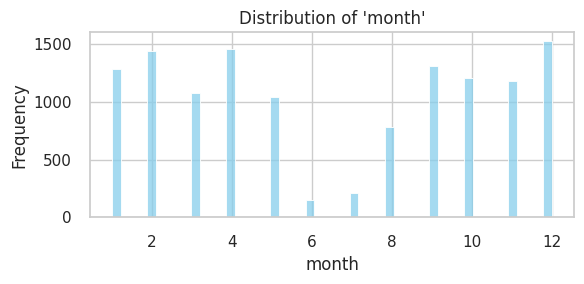

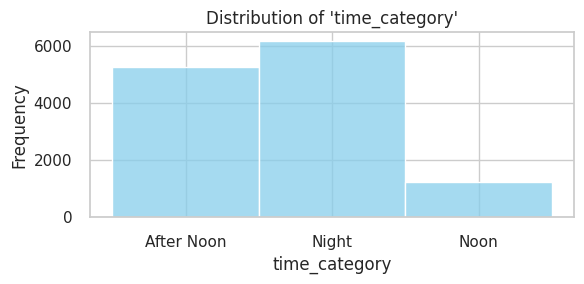

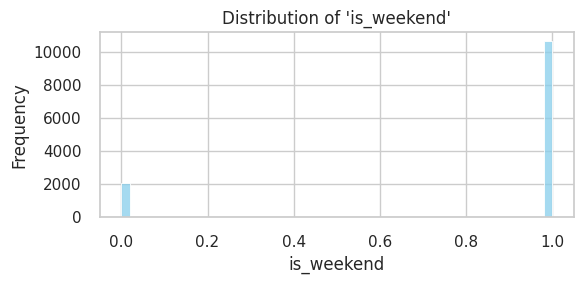

In [11]:
# Set overall figure style
sns.set(style="whitegrid")

# Loop through and plot each feature
for col in datetime_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_FE[col], bins=50, kde=False, color="skyblue")
    plt.title(f"Distribution of '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Historical Performance & Goal Metrics

Goals from Previous Games: Use cumulative or average goals and goal rates (e.g., goals/xGoals) computed prior to the current match.

In [12]:
# Refactored: Safe, non-leaky team metrics without goals, assists, or direct xG scoring

def compute_safe_team_metrics(df):
    """
    Computes rolling and differential metrics for each team using only non-leaky, currently available features.

    Features include:
    - Rolling 5-game averages for pressing (PPDA) and xGoalsChain
    - Difference metrics between home and away teams

    Parameters:
    -----------
    df : pd.DataFrame
        Match-level dataframe sorted by date with home/away team IDs and stats.

    Returns:
    --------
    pd.DataFrame
        Original dataframe with added engineered features.
    """
    df = df.sort_values(by=["season", "date", "gameID"]).copy()

    def team_rolling_features(df, team_col, xchain_col, ppda_col):
        team_frames = []
        for team_id, team_df in df.groupby(team_col):
            team_df = team_df.copy()
            team_df["rolling_xchain"] = team_df[xchain_col].rolling(5).mean().shift()
            team_df["rolling_ppda"] = team_df[ppda_col].rolling(5).mean().shift()
            team_df.fillna(0, inplace=True)
            team_frames.append(team_df)
        return pd.concat(team_frames)

    # Compute rolling stats for both home and away teams
    home = team_rolling_features(df, "homeTeamID", "home_total_xGoalsChain", "home_ppda")
    away = team_rolling_features(df, "awayTeamID", "away_total_xGoalsChain", "away_ppda")

    # Add engineered deltas between home and away
    df["xchain_diff"] = home["rolling_xchain"].values - away["rolling_xchain"].values
    df["ppda_diff"] = home["rolling_ppda"].values - away["rolling_ppda"].values

    # Add safe rolling stats directly to df
    df["home_rolling_xchain"] = home["rolling_xchain"].values
    df["away_rolling_xchain"] = away["rolling_xchain"].values
    df["home_rolling_ppda"] = home["rolling_ppda"].values
    df["away_rolling_ppda"] = away["rolling_ppda"].values

    return df

In [13]:
df_FE2 = compute_safe_team_metrics(df_FE)

In [14]:
df_FE2

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,away_total_saved_shots_cat,month,time_category,is_weekend,xchain_diff,ppda_diff,home_rolling_xchain,away_rolling_xchain,home_rolling_ppda,away_rolling_ppda
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,2,8,Night,True,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,2,8,Night,True,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,4,8,Night,True,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,0,8,Night,True,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,1,8,Night,True,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,3,5,Night,True,-1.770427,1.75100,1.845803,3.616230,15.52556,13.77456
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,3,5,Night,True,-1.180025,-0.87664,2.210479,3.390504,14.42014,15.29678
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,2,5,Night,True,-2.003363,1.15284,1.256744,3.260107,17.34174,16.18890
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,1,5,Night,True,-0.923391,2.51846,1.845621,2.769012,18.46746,15.94900


In [15]:
# Get new features that are in df_FE but not in df and not datetime-related
new_features = [col for col in df_FE2.columns 
                if col not in df.columns and col not in datetime_features]

print(f"New engineered features ({len(new_features)}):")
print(new_features)


New engineered features (6):
['xchain_diff', 'ppda_diff', 'home_rolling_xchain', 'away_rolling_xchain', 'home_rolling_ppda', 'away_rolling_ppda']


In [16]:
new_features

['xchain_diff',
 'ppda_diff',
 'home_rolling_xchain',
 'away_rolling_xchain',
 'home_rolling_ppda',
 'away_rolling_ppda']

In [17]:
df_FE2[new_features].describe()


,xchain_diff,ppda_diff,home_rolling_xchain,away_rolling_xchain,home_rolling_ppda,away_rolling_ppda
count,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000
mean,0.751586,-1.233344,3.769354,3.017768,9.816792,11.050136
std,1.721355,3.807147,2.226134,1.851099,3.935962,4.670632
min,-7.392861,-31.638020,0.000000,0.000000,0.000000,0.000000
25%,-0.223686,-3.090115,2.373369,1.834156,7.838015,8.594955
50%,0.617738,-0.848970,3.401289,2.685637,9.653870,10.805200
75%,1.729667,0.782085,4.797054,3.895729,11.883275,13.464385
max,11.534970,20.681680,17.324410,15.870842,31.888240,41.578900


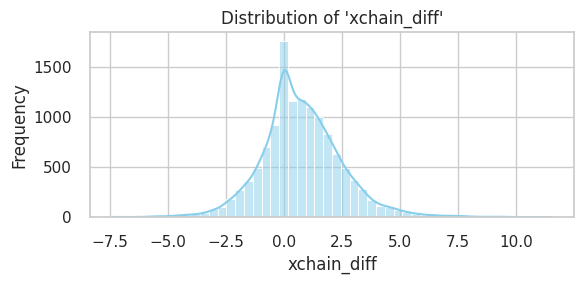

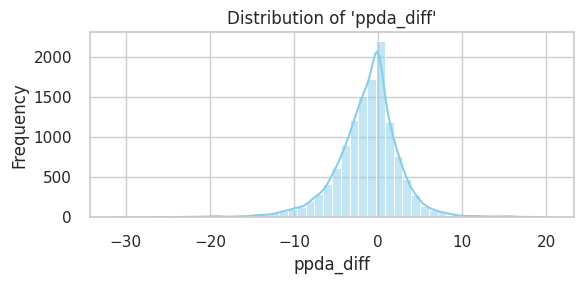

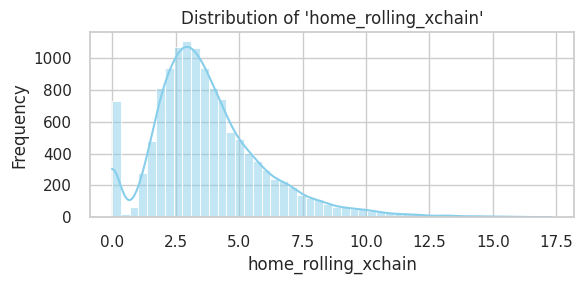

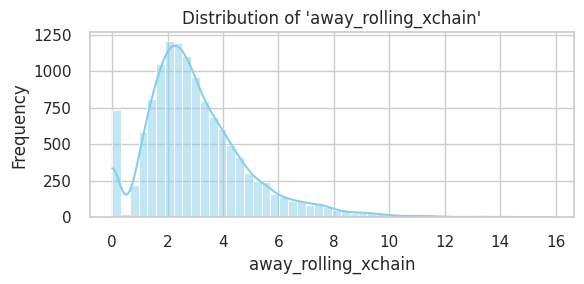

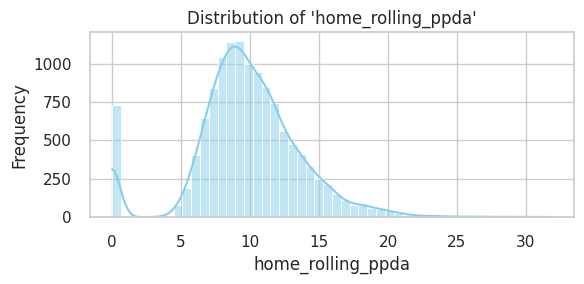

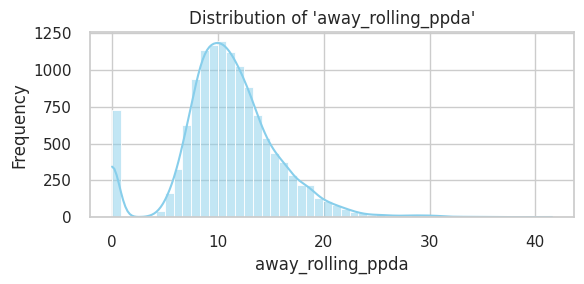

In [18]:
# Set overall figure style
sns.set(style="whitegrid")

# Loop through and plot each feature
for col in new_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_FE2[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Defensive Metrics & Discipline

Defensive Ratings: Compute ratios like blocked_shots/total_shots and a disciplinary index based on fouls and cards.

In [19]:
# Cleaned and corrected: compute_defensive_features

def compute_defensive_features(df):
    """
    Computes defensive efficiency and disciplinary behavior metrics for each team 
    up to the current game (excluding the current game's data to avoid leakage).

    Defensive Efficiency:
    - Blocked shots / (total shots conceded + 1e-5)
    - Shots on target conceded / (total shots conceded + 1e-5)

    Card Penalties:
    - Average penalty score per game (discipline_score_avg)

    Parameters:
    -----------
    df : pd.DataFrame
        Match-level dataframe with home/away teams and defensive/card stats

    Returns:
    --------
    pd.DataFrame
        Original dataframe with new features added for both home and away teams
    """

    df = df.sort_values(by=["season", "date", "gameID"]).copy()

    def get_defensive_stats(df, team_col, 
                            shots_conceded_col, shots_on_target_conceded_col, 
                            blocked_shots_col, 
                            fouls_col, yellow_col, red_col):

        team_records = []

        for team_id, team_df in df.groupby(team_col):
            team_df = team_df.copy()

            # Shift to exclude current game
            shots_conceded = team_df[shots_conceded_col].shift()
            shots_on_target_conceded = team_df[shots_on_target_conceded_col].shift()
            blocked_shots = team_df[blocked_shots_col].shift()

            # Defensive efficiency metrics
            team_df["blocked_shot_ratio"] = blocked_shots / (shots_conceded + 1e-5)
            team_df["shot_conceded_ratio"] = shots_on_target_conceded / (shots_conceded + 1e-5)

            # Compute discipline score: -1*fouls, -3*yellow, -10*red
            foul_score = team_df[fouls_col].shift(fill_value=0) * -1
            yellow_score = team_df[yellow_col].shift(fill_value=0) * -3
            red_score = team_df[red_col].shift(fill_value=0) * -10

            team_df["discipline_score"] = (foul_score + yellow_score + red_score).cumsum()

            # Count games played before each match
            team_df["games_played"] = (~team_df[fouls_col].isna()).cumsum() - 1
            team_df["discipline_score_avg"] = team_df["discipline_score"] / (team_df["games_played"] + 1e-5)

            # Fill NaNs (e.g. in first row) with 0
            team_df.fillna(0, inplace=True)

            team_records.append(team_df)

        return pd.concat(team_records)

    # Compute stats for both home and away teams
    home_stats = get_defensive_stats(
        df,
        team_col="homeTeamID",
        shots_conceded_col="away_shots",
        shots_on_target_conceded_col="away_shotsOnTarget",
        blocked_shots_col="home_total_blocked_shots",
        fouls_col="home_fouls",
        yellow_col="home_total_yellow_cards",
        red_col="home_total_red_cards"
    )

    away_stats = get_defensive_stats(
        df,
        team_col="awayTeamID",
        shots_conceded_col="home_shots",
        shots_on_target_conceded_col="home_shotsOnTarget",
        blocked_shots_col="away_total_blocked_shots",
        fouls_col="away_fouls",
        yellow_col="away_total_yellow_cards",
        red_col="away_total_red_cards"
    )

    # Features to bring back into main dataframe
    features = [
        "blocked_shot_ratio", "shot_conceded_ratio",
        "discipline_score_avg"
    ]

    for col in features:
        df[f"home_{col}"] = home_stats[col].values
        df[f"away_{col}"] = away_stats[col].values

    return df

In [20]:
df_FE3 = compute_defensive_features(df_FE2)

In [21]:
df_FE3

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,home_rolling_xchain,away_rolling_xchain,home_rolling_ppda,away_rolling_ppda,home_blocked_shot_ratio,away_blocked_shot_ratio,home_shot_conceded_ratio,away_shot_conceded_ratio,home_discipline_score_avg,away_discipline_score_avg
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,0.000000,0.000000,0.00000,0.00000,0.363636,0.166667,0.363636,0.166667,-22.999770,-17.999820
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,0.000000,0.000000,0.00000,0.00000,0.111111,0.055556,0.333333,0.055556,-17.499913,-15.499923
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,0.000000,0.000000,0.00000,0.00000,0.222222,0.058823,0.333333,0.470588,-16.333279,-15.333282
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,0.000000,0.000000,0.00000,0.00000,0.090663,0.266666,0.634644,0.400000,-13.249967,-16.999958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,1.845803,3.616230,15.52556,13.77456,0.250000,0.150000,0.375000,0.250000,-13.833322,-19.249984
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,2.210479,3.390504,14.42014,15.29678,1.799996,0.272727,0.399999,0.545454,-14.692296,-18.769216
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,1.256744,3.260107,17.34174,16.18890,0.100000,0.300000,0.400000,0.300000,-14.785704,-18.285701
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,1.845621,2.769012,18.46746,15.94900,0.200000,0.100000,0.100000,0.600000,-14.933323,-17.799988


In [22]:
# Get new features that are in df_FE but not in df and not datetime-related
new_defensive_features = [col for col in df_FE3.columns 
                if col not in df.columns and col not in datetime_features and col not in new_features]

print(f"New engineered features ({len(new_defensive_features)}):")
print(new_defensive_features)

New engineered features (6):
['home_blocked_shot_ratio', 'away_blocked_shot_ratio', 'home_shot_conceded_ratio', 'away_shot_conceded_ratio', 'home_discipline_score_avg', 'away_discipline_score_avg']


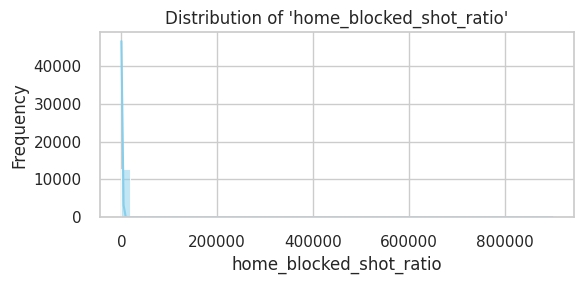

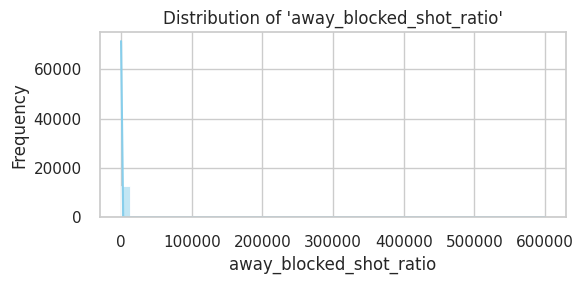

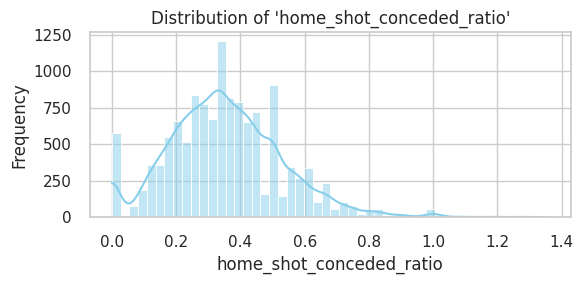

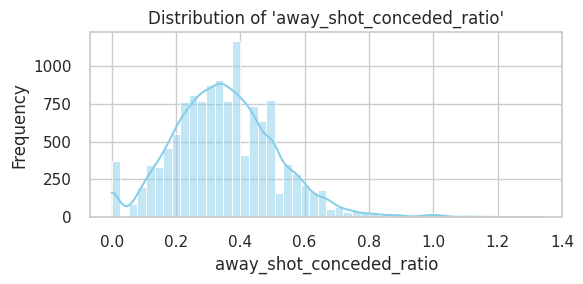

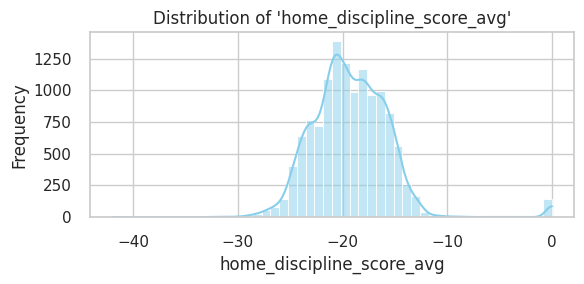

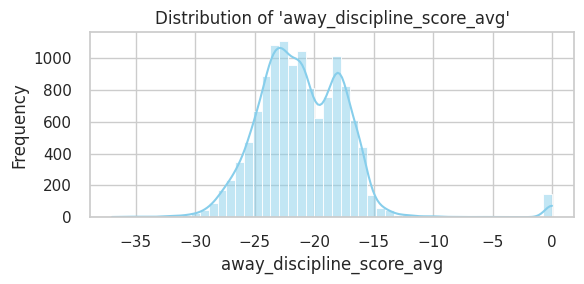

In [23]:
# Set overall figure style
sns.set(style="whitegrid")

# Loop through and plot each feature
for col in new_defensive_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_FE3[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Relative Strength & Home/Away Differences


Difference in home team’s performance vs. away team’s performance. Create features capturing the difference in cumulative points or recent form.

In [24]:
df_FE3['gameresult'].value_counts()

2    5654
0    3854
1    3172
Name: gameresult, dtype: int64

In [25]:
# Cleaned and corrected: compute_relative_strength_features

def compute_relative_strength_features(df):
    """
    Computes relative strength features between home and away teams using only safe, non-leaky metrics:
    - Difference in cumulative points (from gameresult only)
    - Difference in recent form (last 5 games)

    This version uses the correct gameresult logic:
        0 = away win, 1 = draw, 2 = home win

    Parameters:
    -----------
    df : pd.DataFrame
        Match-level dataframe with 'gameresult', team IDs, and sorted by date.

    Returns:
    --------
    pd.DataFrame
        DataFrame with added relative strength features.
    """
    df = df.sort_values(by=["season", "date", "gameID"]).copy()

    def result_to_points(res, is_home):
        if res == 2:   return 3 if is_home else 0
        if res == 0:   return 0 if is_home else 3
        return 1

    def compute_team_points(df, team_col, is_home_team):
        team_records = []
        for team_id, team_df in df.groupby(team_col):
            team_df = team_df.copy()
            team_df["points"] = team_df["gameresult"].apply(
                lambda res: result_to_points(res, is_home=is_home_team)
            ).shift()
            team_df["cumulative_points"] = team_df["points"].cumsum()
            team_df["recent_form"] = team_df["points"].rolling(5).sum()
            team_df[["cumulative_points", "recent_form"]] = team_df[["cumulative_points", "recent_form"]].fillna(0)
            team_records.append(team_df)
        return pd.concat(team_records)

    home_stats = compute_team_points(df, "homeTeamID", is_home_team=True)
    away_stats = compute_team_points(df, "awayTeamID", is_home_team=False)

    df["points_diff"] = home_stats["cumulative_points"].values - away_stats["cumulative_points"].values
    df["recent_form_diff"] = home_stats["recent_form"].values - away_stats["recent_form"].values

    return df

In [26]:
df_FE4 = compute_relative_strength_features(df_FE3)

In [27]:
df_FE4

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,home_rolling_ppda,away_rolling_ppda,home_blocked_shot_ratio,away_blocked_shot_ratio,home_shot_conceded_ratio,away_shot_conceded_ratio,home_discipline_score_avg,away_discipline_score_avg,points_diff,recent_form_diff
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,0.00000,0.00000,0.363636,0.166667,0.363636,0.166667,-22.999770,-17.999820,-2.0,0.0
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,0.00000,0.00000,0.111111,0.055556,0.333333,0.055556,-17.499913,-15.499923,-2.0,0.0
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,0.00000,0.00000,0.222222,0.058823,0.333333,0.470588,-16.333279,-15.333282,-2.0,0.0
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,0.00000,0.00000,0.090663,0.266666,0.634644,0.400000,-13.249967,-16.999958,-2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,15.52556,13.77456,0.250000,0.150000,0.375000,0.250000,-13.833322,-19.249984,4.0,2.0
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,14.42014,15.29678,1.799996,0.272727,0.399999,0.545454,-14.692296,-18.769216,3.0,-1.0
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,17.34174,16.18890,0.100000,0.300000,0.400000,0.300000,-14.785704,-18.285701,2.0,-5.0
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,18.46746,15.94900,0.200000,0.100000,0.100000,0.600000,-14.933323,-17.799988,5.0,-1.0


In [28]:
# Get new features that are in df_FE but not in df and not datetime-related
new_strength_features = [col for col in df_FE4.columns 
                if col not in df.columns and col not in datetime_features 
                and col not in new_features and col not in new_defensive_features]

print(f"New engineered features ({len(new_strength_features)}):")
print(new_strength_features)

New engineered features (2):
['points_diff', 'recent_form_diff']


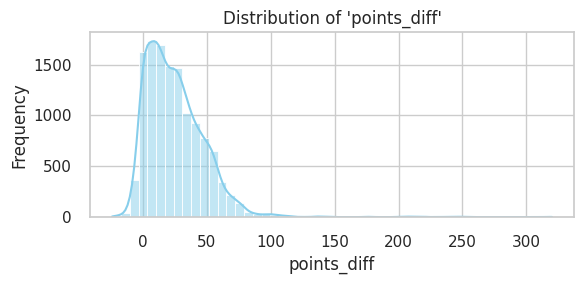

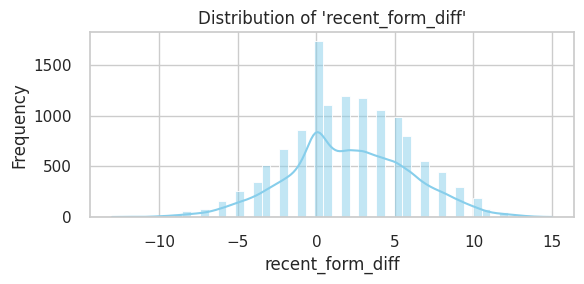

In [29]:
# Set overall figure style
sns.set(style="whitegrid")

# Loop through and plot each feature
for col in new_strength_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_FE4[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [30]:
df_FE_final = df_FE4.copy()

In [31]:
# saving df after finishing feature engineering
with open("../pickles/df_after_feature_engineering_new.pkl", "wb") as f:
    pickle.dump(df_FE_final, f)  # Save the DataFrame with standard pickle